In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

RANDOM_STATE = 42

raw_df = pd.read_csv('/Users/ethanmc/git-repos/kaggle/challenge-09162024/kaggle/input/winequality-red.csv')

X = raw_df.drop('quality', axis=1)
y = raw_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = RANDOM_STATE)

regr_model = LinearRegression()

regr_model.fit(X_train, y_train)

y_pred = regr_model.predict(X_test)

y_pred_rounded = np.round(y_pred).astype(int)

# The coefficients
print("Coefficients: \n", regr_model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_rounded))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


'''
Question: Why is linear regression so shitty???

Coefficients: 
 [ 1.91482708e-02 -1.04879349e+00 -2.05059436e-01  1.84280865e-02
 -1.71727378e+00  3.14508676e-03 -3.00515039e-03 -2.07241572e+01
 -3.26748948e-01  7.89183448e-01  2.88943124e-01]
Mean squared error: 0.48
Coefficient of determination: 0.36

'''


Coefficients: 
 [ 1.91482708e-02 -1.04879349e+00 -2.05059436e-01  1.84280865e-02
 -1.71727378e+00  3.14508676e-03 -3.00515039e-03 -2.07241572e+01
 -3.26748948e-01  7.89183448e-01  2.88943124e-01]
Mean squared error: 0.48
Coefficient of determination: 0.36


'\nQuestion: Why is linear regression so shitty???\n\nCoefficients: \n [ 1.91482708e-02 -1.04879349e+00 -2.05059436e-01  1.84280865e-02\n -1.71727378e+00  3.14508676e-03 -3.00515039e-03 -2.07241572e+01\n -3.26748948e-01  7.89183448e-01  2.88943124e-01]\nMean squared error: 0.48\nCoefficient of determination: 0.36\n\n'

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

RANDOM_STATE = 42

raw_df = pd.read_csv('/Users/ethanmc/git-repos/kaggle/challenge-09162024/kaggle/input/winequality-red.csv')

X = raw_df.drop('quality', axis=1)
y = raw_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = RANDOM_STATE)

regr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=RANDOM_STATE)

regr_model.fit(X_train, y_train)

y_pred = regr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.56

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        19
           5       0.63      0.75      0.68       217
           6       0.51      0.59      0.55       213
           7       0.40      0.14      0.21        70
           8       0.00      0.00      0.00         7

    accuracy                           0.56       528
   macro avg       0.26      0.25      0.24       528
weighted avg       0.52      0.56      0.53       528



/Users/ethanmc/git-repos/kaggle/challenge-one/kaggle_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/ethanmc/git-repos/kaggle/challenge-one/kaggle_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ethanmc/git-repos/kaggle/challenge-one/kaggle_env/lib/python3.10/site-packages/sklearn/metrics/_classific

In [3]:
'''
So we have:
baseline linear regression accuracy (with rounded prediction values): 0.36
baseline multi-class logistic regression accuracy: 0.56
'''

'\nSo we have:\nbaseline linear regression accuracy (with rounded prediction values): 0.36\nbaseline multi-class logistic regression accuracy: 0.56\n'

In [4]:
class_counts = y.value_counts().sort_index()

# Print the counts for each quality score
print(class_counts)

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


/var/folders/lp/df3tgm3d27lcbppfk7jpxbmw0000gn/T/ipykernel_38876/2571636595.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


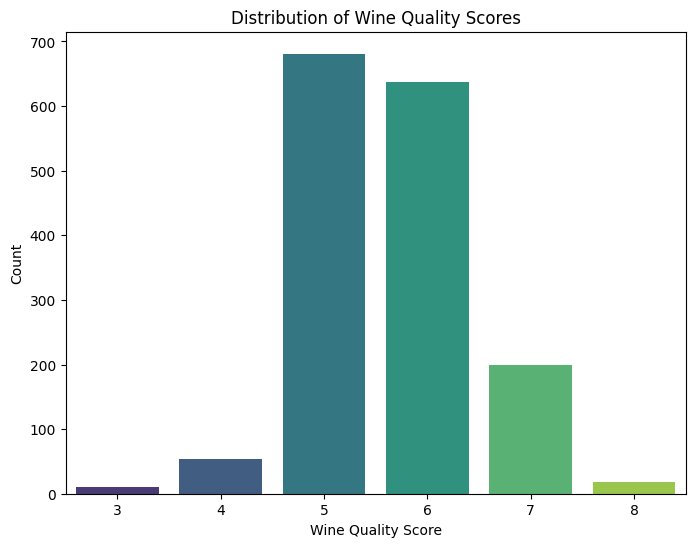

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution as a bar plot
plt.figure(figsize=(8,6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")

# Add labels and title
plt.xlabel('Wine Quality Score')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality Scores')

# Show the plot
plt.show()

In [6]:
'''
Okay so we only really have socres of 3-8. Also, we have barely ANY scores of 3, 4, and 8.

Looks like we have < 100 of 3, 4, 8.

So a few further questions:
- we can improve the predictions for our majority classes
- we can deal with the imbalance
- we can smooth classes together (e.g. 3 and 4, 7 and 8)
    - low score, medium score, high score
- we can improve our features

I want to improve the data:
(1) So I'm going to do that by working on the imbalance.
(2) Feature improvement to increase score for the majority classes
'''


"\nOkay so we only really have socres of 3-8. Also, we have barely ANY scores of 3, 4, and 8.\n\nLooks like we have < 100 of 3, 4, 8.\n\nSo a few further questions:\n- we can improve the predictions for our majority classes\n- we can deal with the imbalance\n- we can smooth classes together (e.g. 3 and 4, 7 and 8)\n    - low score, medium score, high score\n- we can improve our features\n\nI want to improve the data:\n(1) So I'm going to do that by working on the imbalance.\n(2) Feature improvement to increase score for the majority classes\n"

In [7]:
'''
Improving the data
'''

'\nImproving the data\n'

In [8]:
'''
- drop NAs
- drop duplicates
- ? drop outliers ?
- ? normalize ? 
'''


# Drop NAs    
print("NA report:\n")
print(raw_df.isna().sum())
raw_df = raw_df.dropna()
print(raw_df.isna().sum())

# Drop duplicates
print("\nDupes report:\n")
print(raw_df.duplicated().sum())
raw_df = raw_df.drop_duplicates()
print(raw_df.duplicated().sum())

NA report:

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Dupes report:

240
0


In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

RANDOM_STATE = 42

X = raw_df.drop('quality', axis=1)
y = raw_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = RANDOM_STATE)

regr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=RANDOM_STATE)

regr_model.fit(X_train, y_train)

y_pred = regr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

/Users/ethanmc/git-repos/kaggle/challenge-one/kaggle_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.62

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        15
           5       0.68      0.78      0.72       192
           6       0.56      0.65      0.60       181
           7       0.67      0.23      0.34        52
           8       0.00      0.00      0.00         4

    accuracy                           0.62       449
   macro avg       0.32      0.28      0.28       449
weighted avg       0.59      0.62      0.59       449



/Users/ethanmc/git-repos/kaggle/challenge-one/kaggle_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ethanmc/git-repos/kaggle/challenge-one/kaggle_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ethanmc/git-repos/kaggle/challenge-one/kaggle_env/lib/python3.10/site-pac

In [10]:
'''
Alright. Dropping Dupes and NAs improved the score of logistic regression from 0.56 to 0.62. Let's continue with feature improvements and then move onto evaluation.
''' 

"\nAlright. Dropping Dupes and NAs improved the score of logistic regression from 0.56 to 0.62. Let's continue with feature improvements and then move onto evaluation.\n"

In [11]:
import imblearn
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

RANDOM_STATE = 42

raw_df = pd.read_csv('/Users/ethanmc/git-repos/kaggle/challenge-09162024/kaggle/input/winequality-red.csv')
raw_df = raw_df.dropna()
raw_df = raw_df.drop_duplicates()

X = raw_df.drop('quality', axis=1)
y = raw_df['quality']
y = y.replace({3: 3, 4: 3})
y = y.replace({7: 8, 8: 8})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# Multi-class smote tutorial: https://machinelearningmastery.com/multi-class-imbalanced-classification/

strategy = {3:100, 8:200}

oversample = SMOTE(sampling_strategy=strategy)
print(X_train.shape)
print(y_train.shape)
X_train, y_train = oversample.fit_resample(X_train, y_train)


class_counts_train = y_train.value_counts().sort_index()

# Damn I got an error doing SMOTE because some of our classes don't even have 5 samples in the training data. So let's combine these classes. We'll combine 3 and 4, and 7 and 8.
# Okay I've combined these classes. Let's see the results below:


(910, 11)
(910,)


/var/folders/lp/df3tgm3d27lcbppfk7jpxbmw0000gn/T/ipykernel_38876/4156455122.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


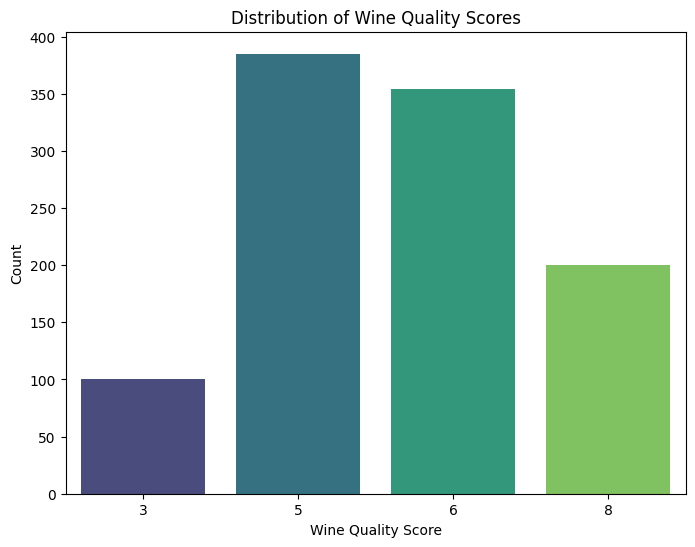

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = y_train.value_counts().sort_index()
# Plot the distribution as a bar plot
plt.figure(figsize=(8,6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")

# Add labels and title
plt.xlabel('Wine Quality Score')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality Scores')

# Show the plot
plt.show()

/var/folders/lp/df3tgm3d27lcbppfk7jpxbmw0000gn/T/ipykernel_38876/2449551580.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


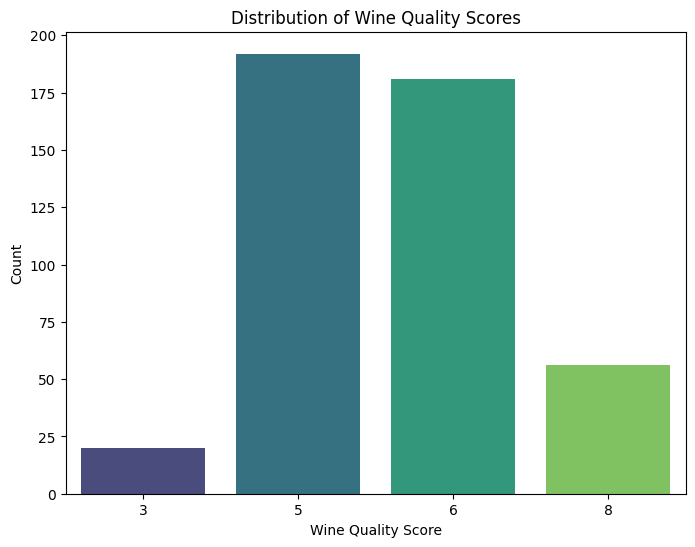

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = y_test.value_counts().sort_index()
# Plot the distribution as a bar plot
plt.figure(figsize=(8,6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")

# Add labels and title
plt.xlabel('Wine Quality Score')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality Scores')

# Show the plot
plt.show()

In [14]:
# Alright now let's train and predict with our logistic regression model.

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

regr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

regr_model.fit(X_train, y_train)

y_pred = regr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

/Users/ethanmc/git-repos/kaggle/challenge-one/kaggle_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.62

Classification Report:
               precision    recall  f1-score   support

           3       0.50      0.30      0.38        20
           5       0.69      0.76      0.72       192
           6       0.59      0.49      0.53       181
           8       0.49      0.66      0.56        56

    accuracy                           0.62       449
   macro avg       0.57      0.55      0.55       449
weighted avg       0.62      0.62      0.61       449



/Users/ethanmc/git-repos/kaggle/challenge-one/kaggle_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
# Okay so we went from accuracy 0.62 to 0.63

In [16]:
# TODO
'''
[ ] clean up this entire notebook for clean comparisons of experiments
[ ] baseline model
[ ] data cleaning
[ ] feature engineering
[ ] go back through and make your results more robust (eg. cross validation, multiple random stats and getting the mean of your results, etc)
[ ] go back and read up about the methods you're using (eg. what does SMOTE actually do? Why did it help to choose a strategy of 100 and 200?)
'''

"\n[ ] clean up this entire notebook for clean comparisons of experiments\n[ ] baseline model\n[ ] data cleaning\n[ ] feature engineering\n[ ] go back through and make your results more robust (eg. cross validation, multiple random stats and getting the mean of your results, etc)\n[ ] go back and read up about the methods you're using (eg. what does SMOTE actually do? Why did it help to choose a strategy of 100 and 200?)\n"

In [17]:
# I want to check for dupes between my training and testing sets

X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

common_rows = pd.merge(X_train_df, X_test_df, how='inner')

print(common_rows)

# Great, no data in common.


Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol]
Index: []


In [18]:
'''
Now I have my enriched base dataset. Let's try to work on some of these features:
going to think up some feature inspection steps to find the most important features, find correlation between features, and find correlation between features and y
'''

"\nNow I have my enriched base dataset. Let's try to work on some of these features:\ngoing to think up some feature inspection steps to find the most important features, find correlation between features, and find correlation between features and y\n"

In [19]:
'''
THIS CELL IS MY FINAL VERSION OF:
- data cleaning (NA, dupes)
- data enrichment (SMOTE, combining classes)
'''

from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42

raw_df = pd.read_csv('/Users/ethanmc/git-repos/kaggle/challenge-09162024/kaggle/input/winequality-red.csv')
raw_df = raw_df.dropna()
raw_df = raw_df.drop_duplicates()

X = raw_df.drop('quality', axis=1)
y = raw_df['quality']
y = y.replace({3: 3, 4: 3})
y = y.replace({7: 8, 8: 8})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# Multi-class smote tutorial: https://machinelearningmastery.com/multi-class-imbalanced-classification/

strategy = {3:100, 8:200}

oversample = SMOTE(sampling_strategy=strategy)
X_train, y_train = oversample.fit_resample(X_train, y_train)

regr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

regr_model.fit(X_train, y_train)

y_pred = regr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/Users/ethanmc/git-repos/kaggle/challenge-one/kaggle_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.61

Classification Report:
               precision    recall  f1-score   support

           3       0.43      0.30      0.35        20
           5       0.69      0.76      0.72       192
           6       0.59      0.49      0.53       181
           8       0.49      0.64      0.56        56

    accuracy                           0.61       449
   macro avg       0.55      0.55      0.54       449
weighted avg       0.61      0.61      0.61       449



/Users/ethanmc/git-repos/kaggle/challenge-one/kaggle_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42

raw_df = pd.read_csv('/Users/ethanmc/git-repos/kaggle/challenge-09162024/kaggle/input/winequality-red.csv')
raw_df = raw_df.dropna()
raw_df = raw_df.drop_duplicates()

X = raw_df.drop('quality', axis=1)
y = raw_df['quality']
y = y.replace({3: 3, 4: 3})
y = y.replace({7: 8, 8: 8})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# Multi-class smote tutorial: https://machinelearningmastery.com/multi-class-imbalanced-classification/

strategy = {3:100, 8:200}

oversample = SMOTE(sampling_strategy=strategy)
X_train, y_train = oversample.fit_resample(X_train, y_train)

regr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

regr_model.fit(X_train, y_train)

# Get feature importance scores
coeffs = regr_model.coef_[0]

importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': coeffs 
})
importance_df['abs_importance'] = importance_df['importance'].abs()
importance_df = importance_df.sort_values(by='abs_importance', ascending=False)

print(importance_df[['feature', 'abs_importance']])

# removing all the collinear features (free sulfur + total sulfur, fixed acidity + density)
important_features_df = importance_df[importance_df['abs_importance'] > 0.08]

important_features = important_features_df['feature']


/Users/ethanmc/git-repos/kaggle/challenge-one/kaggle_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


                 feature  abs_importance
1       volatile acidity        3.587417
8                     pH        1.961032
9              sulphates        1.691058
10               alcohol        0.767312
2            citric acid        0.318257
7                density        0.277939
4              chlorides        0.081332
0          fixed acidity        0.078380
6   total sulfur dioxide        0.008533
5    free sulfur dioxide        0.007425
3         residual sugar        0.003018


/Users/ethanmc/git-repos/kaggle/challenge-one/kaggle_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# THIS CELL CALCULATES THE IMPORTANT FEATURES
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42

raw_df = pd.read_csv('/Users/ethanmc/git-repos/kaggle/challenge-09162024/kaggle/input/winequality-red.csv')
raw_df = raw_df.dropna()
raw_df = raw_df.drop_duplicates()

X = raw_df.drop('quality', axis=1)
y = raw_df['quality']
y = y.replace({3: 3, 4: 3})
y = y.replace({7: 8, 8: 8})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# Multi-class smote tutorial: https://machinelearningmastery.com/multi-class-imbalanced-classification/

strategy = {3:100, 8:200}

oversample = SMOTE(sampling_strategy=strategy)
X_train, y_train = oversample.fit_resample(X_train, y_train)

regr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

regr_model.fit(X_train, y_train)

# Get feature importance scores
coeffs = regr_model.coef_[0]

importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': coeffs 
})
importance_df['abs_importance'] = importance_df['importance'].abs()
importance_df = importance_df.sort_values(by='abs_importance', ascending=False)

important_features_df = importance_df[importance_df['abs_importance'] > 0.1]

important_features = important_features_df['feature']

/Users/ethanmc/git-repos/kaggle/challenge-one/kaggle_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/ethanmc/git-repos/kaggle/challenge-one/kaggle_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
# THIS CELL USESE THE IMPORTANT FEATURES

raw_df = pd.read_csv('/Users/ethanmc/git-repos/kaggle/challenge-09162024/kaggle/input/winequality-red.csv')
raw_df = raw_df.dropna()
raw_df = raw_df.drop_duplicates()

X = raw_df.drop('quality', axis=1)
y = raw_df['quality']
y = y.replace({3: 3, 4: 3})
y = y.replace({7: 8, 8: 8})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

X_train = X_train[important_features]
X_test = X_test[important_features]

# Multi-class smote tutorial: https://machinelearningmastery.com/multi-class-imbalanced-classification/

strategy = {3:100, 8:200}

oversample = SMOTE(sampling_strategy=strategy)
X_train, y_train = oversample.fit_resample(X_train, y_train)

regr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

regr_model.fit(X_train, y_train)

y_pred = regr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/Users/ethanmc/git-repos/kaggle/challenge-one/kaggle_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.60

Classification Report:
               precision    recall  f1-score   support

           3       0.44      0.20      0.28        20
           5       0.65      0.78      0.71       192
           6       0.59      0.44      0.50       181
           8       0.49      0.64      0.55        56

    accuracy                           0.60       449
   macro avg       0.54      0.52      0.51       449
weighted avg       0.59      0.60      0.59       449



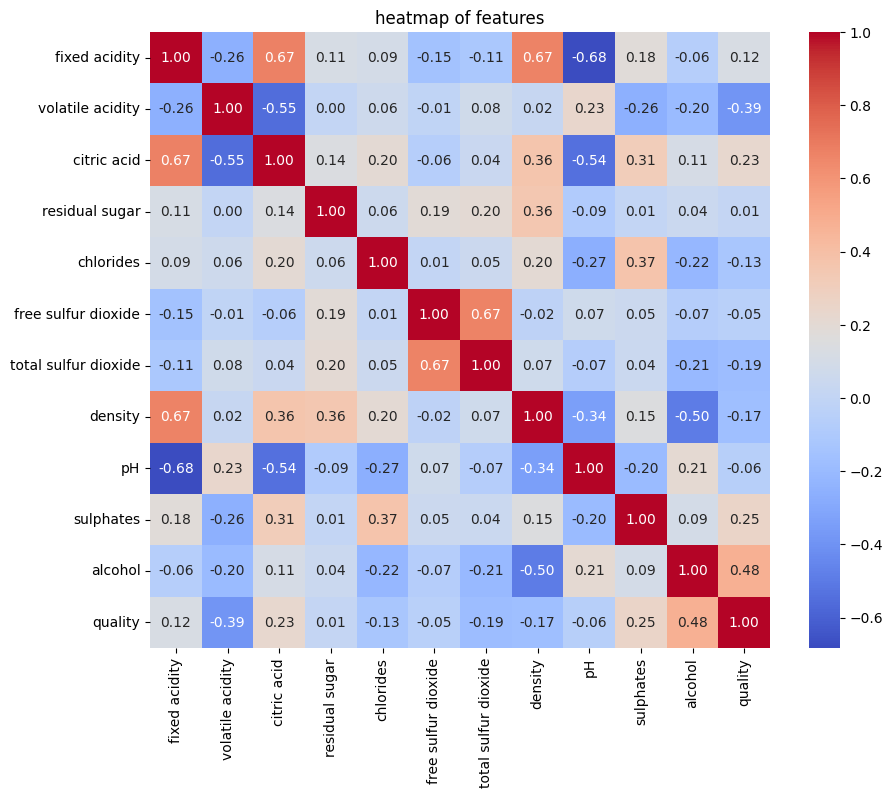

In [23]:
# Let's make a correlation heat map
import pandas as pd
import matplotlib.pyplot as plt
raw_df = pd.read_csv('/Users/ethanmc/git-repos/kaggle/challenge-09162024/kaggle/input/winequality-red.csv')

X = raw_df.drop('quality', axis=1)
y = raw_df['quality']

plt.figure(figsize=(10, 8))
sns.heatmap(raw_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("heatmap of features")
plt.show()